In [370]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [371]:
# Mengatur opsi untuk menampilkan semua kolom
pd.set_option('display.max_columns', None)
# Mengatur opsi untuk melingkupi konten kolom
pd.set_option('display.max_colwidth', None)


#### Load Data

In [372]:
df = pd.read_csv('../../datasets/cause-of-death/Penyebab Kematian di Indonesia yang Dilaporkan - Raw.csv')
# df = pd.read_csv('datasets/cause-of-death/Penyebab Kematian di Indonesia yang Dilaporkan - Clean.csv')
df.head(5)

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
0,Abrasi Air Laut,Bencana Alam,2012,1,0,Profil Kesehatan Indonesia Tahun 2012,Lampiran 3.38,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2012.pdf
1,AIDS,Bencana Non Alam dan Penyakit,2000,1,47,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2004.pdf
2,AIDS,Bencana Non Alam dan Penyakit,2001,1,99,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2004.pdf
3,AIDS,Bencana Non Alam dan Penyakit,2002,1,100,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2004.pdf
4,AIDS,Bencana Non Alam dan Penyakit,2003,1,261,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2004.pdf


#### Check Data

In [373]:
df.describe()

,Year,Data Redundancy,Total Deaths
count,990.000000,990.000000,990.000000
mean,2009.455556,0.623232,1132.813131
std,4.587487,0.484821,5201.675180
min,2000.000000,0.000000,0.000000
25%,2006.000000,0.000000,7.000000
50%,2009.000000,1.000000,43.000000
75%,2013.000000,1.000000,276.000000
max,2021.000000,1.000000,129171.000000


In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Cause            990 non-null    object
 1   Type             990 non-null    object
 2   Year             990 non-null    int64 
 3   Data Redundancy  990 non-null    int64 
 4   Total Deaths     990 non-null    int64 
 5   Source           990 non-null    object
 6   Page at Source   988 non-null    object
 7   Source URL       988 non-null    object
dtypes: int64(3), object(5)
memory usage: 62.0+ KB


#### 15 Penyebab Penyakit Teratas

In [375]:
df.value_counts("Cause").head(15)

Cause
Avian Influenza (Flu Burung)    101
Antraks                          74
Leptospirosis                    68
KLB Diare                        64
Rabies - Lyssa                   51
AIDS                             41
Demam Berdarah Dengue (DBD)      24
Tetanus Neonatorium              22
Banjir                           13
Gempa Bumi                       13
KLB Campak                       13
Banjir Bandang                   13
Tanah Longsor                    13
Difteri                          13
Campak                           10
dtype: int64

#### jenis penyakit

In [376]:
df.value_counts("Type")

Type
Bencana Non Alam dan Penyakit    848
Bencana Alam                     126
Bencana Sosial                    16
dtype: int64

#### Variable Description
1. Cause : specific cause of the death
2. Type : category of the cause
3. Year : year of the occurance
4. Data Redundancy: number of copies of same data in the database
5. Total Deaths : number of the death
6. Source : source name
7. Page at Source : page number at the source
8. Source URL : source url

#### Handle Missing Values

In [377]:
df.isnull().sum()


Cause              0
Type               0
Year               0
Data Redundancy    0
Total Deaths       0
Source             0
Page at Source     2
Source URL         2
dtype: int64

In [378]:
df[df["Source URL"].isna() | df["Page at Source"].isna()]

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
310,COVID-19,Bencana Non Alam dan Penyakit,2020,1,22138,COVID19.go.id,NaN,NaN
311,COVID-19 (per tanggal 24/4/2021),Bencana Non Alam dan Penyakit,2021,1,22362,COVID19.go.id,NaN,NaN


##### Update Data COVID-19 (Merge)

In [379]:
df.loc[df.Cause == "COVID-19", "Total Deaths"] = 22138 + 37889
df.loc[df.Cause == "COVID-19", "Year"] = 2021
df.loc[df.Cause == "COVID-19", "Source URL"] = "unknown"
df.loc[df.Cause == "COVID-19", "Page at Source"] = "unknown"

In [380]:
df_to_drop = df[ df['Cause'] == "COVID-19 (per tanggal 3/7/2021)" ] 
df = df.drop(df_to_drop.index, axis=0)
df.reset_index(drop=True, inplace=True)

In [381]:
df[(df["Cause"]=="COVID-19") | (df["Cause"]=="COVID-19 (per tanggal 3/7/2021)")]

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
310,COVID-19,Bencana Non Alam dan Penyakit,2021,1,60027,COVID19.go.id,unknown,unknown


In [382]:
df.isnull().sum()

Cause              0
Type               0
Year               0
Data Redundancy    0
Total Deaths       0
Source             0
Page at Source     1
Source URL         1
dtype: int64

#### Ternyata masih ada data covid, jadi kita merger lagi

In [383]:
df[df["Source URL"].isna() | df["Page at Source"].isna()]

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
311,COVID-19 (per tanggal 24/4/2021),Bencana Non Alam dan Penyakit,2021,1,22362,COVID19.go.id,NaN,NaN


In [384]:
df.loc[df.Cause == "COVID-19", "Total Deaths"] = 22138 + 22362
df.loc[df.Cause == "COVID-19", "Year"] = 2021
df.loc[df.Cause == "COVID-19", "Source URL"] = "unknown"
df.loc[df.Cause == "COVID-19", "Page at Source"] = "unknown"

df_to_drop = df[ df['Cause'] == "COVID-19 (per tanggal 24/4/2021)" ] 
df = df.drop(df_to_drop.index, axis=0)
df.reset_index(drop=True, inplace=True)

df[df["Source URL"].isna() | df["Page at Source"].isna()]

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL


##### cek apa sudah tidak ada missing values

In [385]:
df.isnull().sum()

Cause              0
Type               0
Year               0
Data Redundancy    0
Total Deaths       0
Source             0
Page at Source     0
Source URL         0
dtype: int64

#### pastikan spasi hanya 1

In [386]:
df['Cause'] = df['Cause'].replace('\s+', ' ', regex=True)
df['Type'] = df['Type'].replace('\s+', ' ', regex=True)
df['Source'] = df['Source'].replace('\s+', ' ', regex=True)
df['Page at Source'] = df['Page at Source'].replace('\s+', ' ', regex=True)
df['Source URL'] = df['Source URL'].replace('\s+', ' ', regex=True)

df.head()

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
0,Abrasi Air Laut,Bencana Alam,2012,1,0,Profil Kesehatan Indonesia Tahun 2012,Lampiran 3.38,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2012.pdf
1,AIDS,Bencana Non Alam dan Penyakit,2000,1,47,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2004.pdf
2,AIDS,Bencana Non Alam dan Penyakit,2001,1,99,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2004.pdf
3,AIDS,Bencana Non Alam dan Penyakit,2002,1,100,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2004.pdf
4,AIDS,Bencana Non Alam dan Penyakit,2003,1,261,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2004.pdf


#### cek data duplikat

In [387]:
df[df.duplicated(keep=False)]


,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
585,KLB Diare,Bencana Non Alam dan Penyakit,2010,1,73,Profil Kesehatan Indonesia Tahun 2011,Lampiran 3.19,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2011.pdf
586,KLB Diare,Bencana Non Alam dan Penyakit,2010,1,73,Profil Kesehatan Indonesia Tahun 2011,Lampiran 3.19,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2011.pdf


In [388]:
df.drop_duplicates(inplace=True)
df[df.duplicated(keep=False)]


,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL


#### cek data duplikat dengan mengecualikan source url

In [389]:
df[df.duplicated(['Cause', 'Type', 'Year', 'Data Redundancy', 'Total Deaths', 'Source', 'Source URL'], keep=False)].head(10)

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
98,Antraks,Bencana Non Alam dan Penyakit,2011,1,1,Profil Kesehatan Indonesia Tahun 2013,158,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2013.pdf
99,Antraks,Bencana Non Alam dan Penyakit,2011,1,1,Profil Kesehatan Indonesia Tahun 2013,Lampiran 6.33,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2013.pdf
106,Antraks,Bencana Non Alam dan Penyakit,2012,1,0,Profil Kesehatan Indonesia Tahun 2013,158,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2013.pdf
107,Antraks,Bencana Non Alam dan Penyakit,2012,1,0,Profil Kesehatan Indonesia Tahun 2013,Lampiran 6.33,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2013.pdf
113,Antraks,Bencana Non Alam dan Penyakit,2013,1,1,Profil Kesehatan Indonesia Tahun 2013,158,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2013.pdf
114,Antraks,Bencana Non Alam dan Penyakit,2013,1,1,Profil Kesehatan Indonesia Tahun 2013,Lampiran 6.33,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2013.pdf
307,"Cedera, Keracunan, dan Akibat Sebab Luar Tertentu Lainnya",Bencana Non Alam dan Penyakit,2008,1,5767,Profil Kesehatan Indonesia Tahun 2008,31,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2008.pdf
308,"Cedera, Keracunan, dan Akibat Sebab Luar Tertentu Lainnya",Bencana Non Alam dan Penyakit,2008,1,5767,Profil Kesehatan Indonesia Tahun 2008,Lampiran 3.4,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2008.pdf
398,"Gejala, Tanda & Penemuan Laboratorium, Klinik Abnormal YTK",Bencana Non Alam dan Penyakit,2008,1,4238,Profil Kesehatan Indonesia Tahun 2008,31,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2008.pdf
399,"Gejala, Tanda & Penemuan Laboratorium, Klinik Abnormal YTK",Bencana Non Alam dan Penyakit,2008,1,4238,Profil Kesehatan Indonesia Tahun 2008,Lampiran 3.4,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2008.pdf


In [390]:
df.drop_duplicates(['Cause', 'Type', 'Year', 'Data Redundancy', 'Total Deaths', 'Source'], keep='first',inplace=True)

In [391]:
df[df.duplicated(['Cause', 'Type', 'Year', 'Data Redundancy', 'Total Deaths', 'Source', 'Source URL'], keep=False)].head(10)

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL


In [392]:
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Cause            970 non-null    object
 1   Type             970 non-null    object
 2   Year             970 non-null    int64 
 3   Data Redundancy  970 non-null    int64 
 4   Total Deaths     970 non-null    int64 
 5   Source           970 non-null    object
 6   Page at Source   970 non-null    object
 7   Source URL       970 non-null    object
dtypes: int64(3), object(5)
memory usage: 60.8+ KB


#### Check Typo

In [393]:
df["Type"].value_counts()

Bencana Non Alam dan Penyakit    828
Bencana Alam                     126
Bencana Sosial                    16
Name: Type, dtype: int64

In [394]:
df["Cause"].value_counts()

Avian Influenza (Flu Burung)    101
Antraks                          71
Leptospirosis                    68
KLB Diare                        62
Rabies - Lyssa                   47
                               ... 
KLB Disentri                      1
KLB Frambusia                     1
KLB Gizi Buruk                    1
Ledakan Akibat Gas                1
Abrasi Air Laut                   1
Name: Cause, Length: 181, dtype: int64

In [395]:
df.describe()

,Year,Data Redundancy,Total Deaths
count,970.000000,970.000000,970.000000
mean,2009.415464,0.627835,1064.374227
std,4.589615,0.483631,5257.578611
min,2000.000000,0.000000,0.000000
25%,2006.000000,0.000000,7.000000
50%,2009.000000,1.000000,42.000000
75%,2012.000000,1.000000,261.000000
max,2021.000000,1.000000,129171.000000


In [396]:
df.head(10)

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
0,Abrasi Air Laut,Bencana Alam,2012,1,0,Profil Kesehatan Indonesia Tahun 2012,Lampiran 3.38,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2012.pdf
1,AIDS,Bencana Non Alam dan Penyakit,2000,1,47,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2004.pdf
2,AIDS,Bencana Non Alam dan Penyakit,2001,1,99,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2004.pdf
3,AIDS,Bencana Non Alam dan Penyakit,2002,1,100,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2004.pdf
4,AIDS,Bencana Non Alam dan Penyakit,2003,1,261,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2004.pdf
5,AIDS,Bencana Non Alam dan Penyakit,2003,1,261,Profil Kesehatan Indonesia Tahun 2007,84,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2007.pdf
6,AIDS,Bencana Non Alam dan Penyakit,2003,1,261,Profil Kesehatan Indonesia Tahun 2008,102,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2008.pdf
7,AIDS,Bencana Non Alam dan Penyakit,2003,1,261,Profil Kesehatan Indonesia Tahun 2009,95,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2009.pdf
8,AIDS,Bencana Non Alam dan Penyakit,2003,1,261,Profil Kesehatan Indonesia Tahun 2010,115,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2010.pdf
9,AIDS,Bencana Non Alam dan Penyakit,2004,1,361,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2004.pdf


### Cek Top Data Penyebab Kematian

In [397]:
# Mengelompokkan data berdasarkan penyebab kematian dan menghitung total jumlah kematian
top_causes = df.groupby('Cause')['Total Deaths'].sum().reset_index()

# Mengurutkan DataFrame berdasarkan kolom "Total Deaths" secara menurun
top_causes = top_causes.sort_values(by='Total Deaths', ascending=False).head(30)
# top_causes

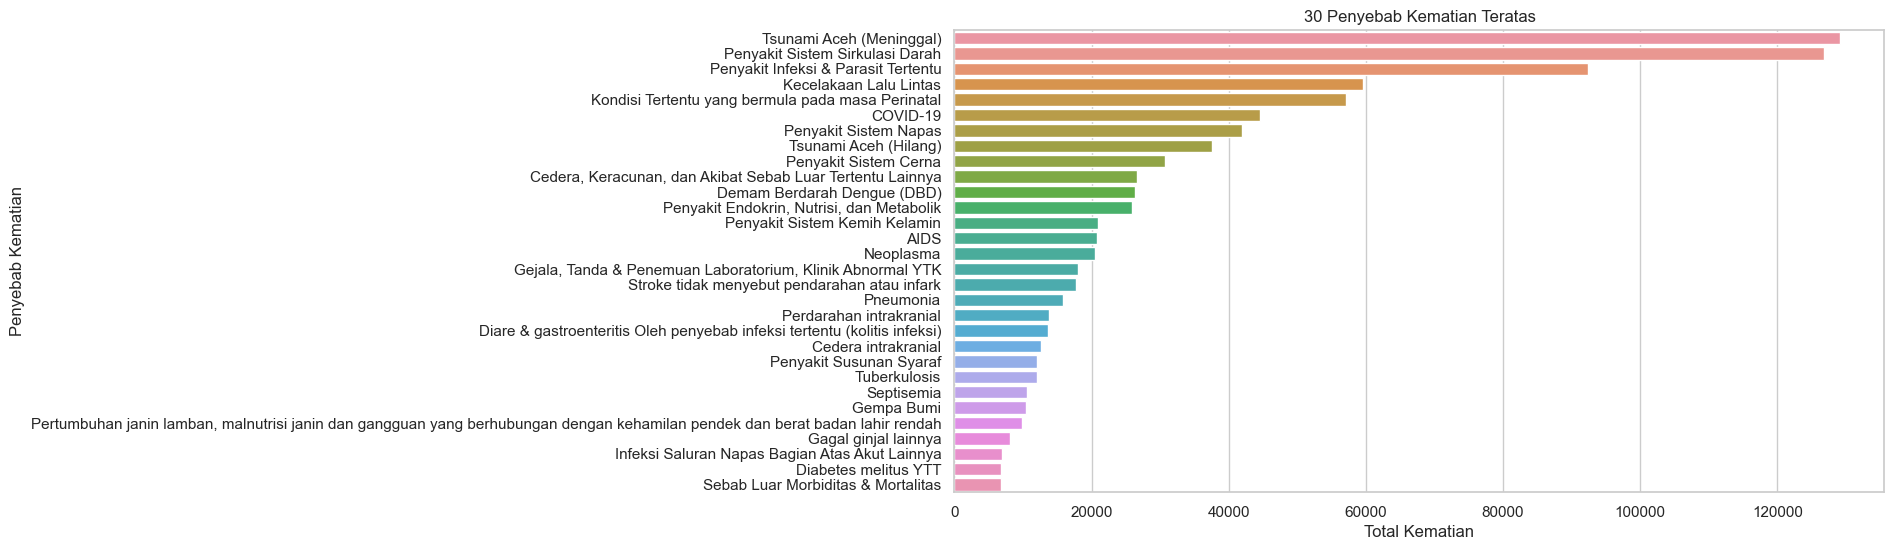

In [398]:
# Membuat plot untuk visualisasi menggunakan Seaborn dengan sumbu x dan y yang ditukar
plt.figure(figsize=(12, 6))
sns.barplot(x='Total Deaths', y='Cause', data=top_causes)
plt.title('30 Penyebab Kematian Teratas')
plt.xlabel('Total Kematian')
plt.ylabel('Penyebab Kematian')
plt.show()

#### TARIK PENYAKIT JADI 1 LEVEL

In [399]:
df.head(5)

,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL
0,Abrasi Air Laut,Bencana Alam,2012,1,0,Profil Kesehatan Indonesia Tahun 2012,Lampiran 3.38,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2012.pdf
1,AIDS,Bencana Non Alam dan Penyakit,2000,1,47,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2004.pdf
2,AIDS,Bencana Non Alam dan Penyakit,2001,1,99,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2004.pdf
3,AIDS,Bencana Non Alam dan Penyakit,2002,1,100,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2004.pdf
4,AIDS,Bencana Non Alam dan Penyakit,2003,1,261,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2004.pdf


In [400]:
# Mendapatkan kata pertama dari setiap nilai dalam kolom "Penyebab Kematian"
df['First Word'] = df['Cause'].str.split().str[0]
first_word = df['First Word'].unique()

delete_keyword = ['Cedera,', 'Kehamilan,', 'Keracunan/KLB', 'Letusan/Peningkatan','Letusan/Peningkatan', 'Penyulit', 'Tersambar', 'Pertumbuhan', 'Sebab', 'Wabah', 'Kejadian']


In [401]:
first_word = [x for x in first_word if x not in delete_keyword]
first_word.append("Morbiditas")
# first_word
# df = df.drop(columns="Keyword")
df.head(2)

first_word

['Abrasi',
 'AIDS',
 'Aksi',
 'Angin',
 'Antraks',
 'Avian',
 'Banjir',
 'Batuk',
 'Bencana',
 'Campak',
 'Cedera',
 'Cikungunya',
 'COVID-19',
 'Demam',
 'Diabetes',
 'Diare',
 'Difteri',
 'Dispepsia',
 'Eklamsia',
 'Erupsi',
 'Faktor',
 'Gagal',
 'Gangguan',
 'Gastritis',
 'Gejala,',
 'Gelombang',
 'Gempa',
 'Gizi',
 'Hepatitis',
 'Hipertensi',
 'Hipoksia',
 'Infeksi',
 'Janin',
 'Kebakaran',
 'Kecelakaan',
 'Kegagalan',
 'Kehamilan',
 'Kekeringan',
 'Keracunan',
 'KLB',
 'Kolera',
 'Kondisi',
 'Konflik',
 'Kronis',
 'Ledakan',
 'Leptospirosis',
 'Letusan',
 'Longsor',
 'Malaria',
 'Malformasi,',
 'Neoplasma',
 'Penyakit',
 'Perdarahan',
 'Persalinan',
 'Petir',
 'Plasenta',
 'Pneumonia',
 'Rabies',
 'Rubella',
 'Septisemia',
 'Stroke',
 'Tanah',
 'TB',
 'Tetanus',
 'Tsunami',
 'Tuberkulosis',
 'Morbiditas']

In [402]:
def find_matching_keyword(cause):
    for kw in first_word:
        if kw in cause:
            return kw
    return None



In [403]:
df['Keyword'] = df['Cause'].apply(find_matching_keyword)
# df['Keyword'].unique()
# df = df.drop(columns="First Word")
# df = df.drop(columns="Source URL")
# df = df.drop(columns="Data Redundancy")
df.head(50)

keyword_column = df.pop('Keyword')  # Memindahkan kolom 'Keyword' dan menyimpannya dalam variabel 'keyword_column'
df.insert(0, 'Keyword', keyword_column)  # Memasukkan kolom 'Keyword' pada indeks ke-0
df.head(10)

,Keyword,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL,First Word
0,Abrasi,Abrasi Air Laut,Bencana Alam,2012,1,0,Profil Kesehatan Indonesia Tahun 2012,Lampiran 3.38,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2012.pdf,Abrasi
1,AIDS,AIDS,Bencana Non Alam dan Penyakit,2000,1,47,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2004.pdf,AIDS
2,AIDS,AIDS,Bencana Non Alam dan Penyakit,2001,1,99,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2004.pdf,AIDS
3,AIDS,AIDS,Bencana Non Alam dan Penyakit,2002,1,100,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2004.pdf,AIDS
4,AIDS,AIDS,Bencana Non Alam dan Penyakit,2003,1,261,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2004.pdf,AIDS
5,AIDS,AIDS,Bencana Non Alam dan Penyakit,2003,1,261,Profil Kesehatan Indonesia Tahun 2007,84,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2007.pdf,AIDS
6,AIDS,AIDS,Bencana Non Alam dan Penyakit,2003,1,261,Profil Kesehatan Indonesia Tahun 2008,102,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2008.pdf,AIDS
7,AIDS,AIDS,Bencana Non Alam dan Penyakit,2003,1,261,Profil Kesehatan Indonesia Tahun 2009,95,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2009.pdf,AIDS
8,AIDS,AIDS,Bencana Non Alam dan Penyakit,2003,1,261,Profil Kesehatan Indonesia Tahun 2010,115,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2010.pdf,AIDS
9,AIDS,AIDS,Bencana Non Alam dan Penyakit,2004,1,361,Profil Kesehatan Indonesia Tahun 2004,78,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2004.pdf,AIDS


In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Keyword          961 non-null    object
 1   Cause            970 non-null    object
 2   Type             970 non-null    object
 3   Year             970 non-null    int64 
 4   Data Redundancy  970 non-null    int64 
 5   Total Deaths     970 non-null    int64 
 6   Source           970 non-null    object
 7   Page at Source   970 non-null    object
 8   Source URL       970 non-null    object
 9   First Word       970 non-null    object
dtypes: int64(3), object(7)
memory usage: 75.9+ KB


In [405]:
df.describe()

,Year,Data Redundancy,Total Deaths
count,970.000000,970.000000,970.000000
mean,2009.415464,0.627835,1064.374227
std,4.589615,0.483631,5257.578611
min,2000.000000,0.000000,0.000000
25%,2006.000000,0.000000,7.000000
50%,2009.000000,1.000000,42.000000
75%,2012.000000,1.000000,261.000000
max,2021.000000,1.000000,129171.000000


In [406]:
df[df.isnull().any(axis=1)]

,Keyword,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL,First Word
820,None,Penyulit kehamilan dan persalinan lainnya,Bencana Non Alam dan Penyakit,2010,0,276,Profil Kesehatan Indonesia Tahun 2010,41,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2010.pdf,Penyulit
821,None,Penyulit kehamilan dan persalinan lainnya,Bencana Non Alam dan Penyakit,2010,0,276,Profil Kesehatan Indonesia Tahun 2011,Lampiran 3.3,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2011.pdf,Penyulit
822,None,"Penyulit kehamilan, persalinan dan masa nifas lainnya",Bencana Non Alam dan Penyakit,2004,0,1508,Profil Kesehatan Indonesia Tahun 2004,19,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2004.pdf,Penyulit
823,None,"Penyulit kehamilan, persalinan dan masa nifas lainnya",Bencana Non Alam dan Penyakit,2005,0,214,Profil Kesehatan Indonesia Tahun 2005,20,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2005.pdf,Penyulit
824,None,"Penyulit kehamilan, persalinan dan masa nifas lainnya",Bencana Non Alam dan Penyakit,2006,0,250,Profil Kesehatan Indonesia Tahun 2006,24,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2006.pdf,Penyulit
841,None,"Pertumbuhan janin lamban, malnutrisi janin dan gangguan yang berhubungan dengan kehamilan pendek dan berat badan lahir rendah",Bencana Non Alam dan Penyakit,2004,0,2100,Profil Kesehatan Indonesia Tahun 2004,16,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2004.pdf,Pertumbuhan
842,None,"Pertumbuhan janin lamban, malnutrisi janin dan gangguan yang berhubungan dengan kehamilan pendek dan berat badan lahir rendah",Bencana Non Alam dan Penyakit,2005,0,2606,Profil Kesehatan Indonesia Tahun 2005,17,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2005.pdf,Pertumbuhan
843,None,"Pertumbuhan janin lamban, malnutrisi janin dan gangguan yang berhubungan dengan kehamilan pendek dan berat badan lahir rendah",Bencana Non Alam dan Penyakit,2006,0,2578,Profil Kesehatan Indonesia Tahun 2006,21 dan 25,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2006.pdf,Pertumbuhan
844,None,"Pertumbuhan janin lamban, malnutrisi janin dan gangguan yang berhubungan dengan kehamilan pendek dan berat badan lahir rendah",Bencana Non Alam dan Penyakit,2006,0,2578,Profil Kesehatan Indonesia Tahun 2007,26,https://pusdatin.kemkes.go.id/download.php?file=download/pusdatin/profil-kesehatan-indonesia/profil-kesehatan-indonesia-2007.pdf,Pertumbuhan


In [407]:
# Mengganti nilai null dengan 'Kehamilan'
df['Keyword'].fillna('Kehamilan', inplace=True)
df[df.isnull().any(axis=1)]

,Keyword,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source,Source URL,First Word


In [408]:
df['Year'].describe()

count     970.000000
mean     2009.415464
std         4.589615
min      2000.000000
25%      2006.000000
50%      2009.000000
75%      2012.000000
max      2021.000000
Name: Year, dtype: float64

### INSIGHT

#### KEMATIAN BERDASARKAN TYPE PENYEBAB KEMATIAN

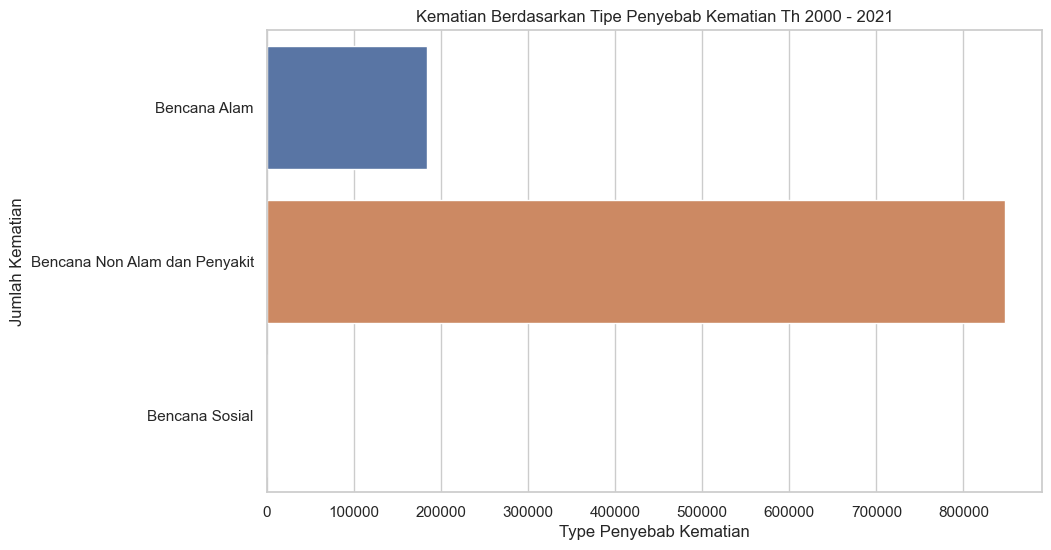

In [409]:
top_causes_by_type = df.groupby('Type')['Total Deaths'].sum()

# Mengatur gaya visualisasi Seaborn
sns.set(style="whitegrid")

# Membuat plot menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_causes_by_type.values, y=top_causes_by_type.index)
plt.xlabel('Type Penyebab Kematian')
plt.ylabel('Jumlah Kematian')
plt.title('Kematian Berdasarkan Tipe Penyebab Kematian Th 2000 - 2021')

# Menampilkan plot
plt.show()

#### Top 20 Cause by Keyword

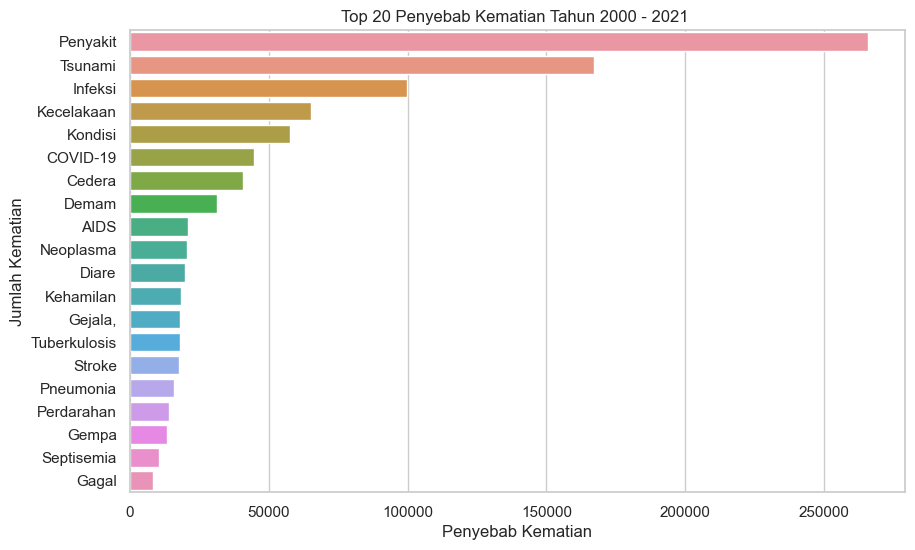

In [410]:
# Mengelompokkan berdasarkan kolom 'Keyword' dan menghitung sum dari 'Total Deaths' setiap grup
top_causes_by_keyword = df.groupby('Keyword')['Total Deaths'].sum().nlargest(20)

# Mengatur gaya visualisasi Seaborn
sns.set(style="whitegrid")

# Membuat plot menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_causes_by_keyword.values, y=top_causes_by_keyword.index)
plt.xlabel('Penyebab Kematian')
plt.ylabel('Jumlah Kematian')
plt.title('Top 20 Penyebab Kematian Tahun 2000 - 2021 ')

# Menampilkan plot
plt.show()

In [411]:
keyword_result = df.loc[df['Type'] == "Bencana Non Alam dan Penyakit", 'Keyword']
print(keyword_result.unique())


['AIDS' 'Antraks' 'Avian' 'Batuk' 'Campak' 'Cedera' 'Cikungunya'
 'COVID-19' 'Demam' 'Diabetes' 'Diare' 'Difteri' 'Dispepsia' 'Eklamsia'
 'Faktor' 'Gagal' 'Gangguan' 'Gastritis' 'Gejala,' 'Gizi' 'Hepatitis'
 'Hipertensi' 'Hipoksia' 'Infeksi' 'Janin' 'Kebakaran' 'Kecelakaan'
 'Kegagalan' 'Kehamilan' 'Keracunan' 'KLB' 'Kolera' 'Kondisi' 'Kronis'
 'Ledakan' 'Leptospirosis' 'Malaria' 'Malformasi,' 'Neoplasma' 'Penyakit'
 'Perdarahan' 'Persalinan' 'Plasenta' 'Pneumonia' 'Rabies' 'Rubella'
 'Morbiditas' 'Septisemia' 'Stroke' 'TB' 'Tetanus' 'Tuberkulosis']


In [413]:
df['Keyword'] = df['Keyword'].replace('TB', 'Tuberkulosis')
keyword_result = df.loc[df['Type'] == "Bencana Non Alam dan Penyakit", 'Keyword']
print(keyword_result.unique())


['AIDS' 'Antraks' 'Avian' 'Batuk' 'Campak' 'Cedera' 'Cikungunya'
 'COVID-19' 'Demam' 'Diabetes' 'Diare' 'Difteri' 'Dispepsia' 'Eklamsia'
 'Faktor' 'Gagal' 'Gangguan' 'Gastritis' 'Gejala,' 'Gizi' 'Hepatitis'
 'Hipertensi' 'Hipoksia' 'Infeksi' 'Janin' 'Kebakaran' 'Kecelakaan'
 'Kegagalan' 'Kehamilan' 'Keracunan' 'KLB' 'Kolera' 'Kondisi' 'Kronis'
 'Ledakan' 'Leptospirosis' 'Malaria' 'Malformasi,' 'Neoplasma' 'Penyakit'
 'Perdarahan' 'Persalinan' 'Plasenta' 'Pneumonia' 'Rabies' 'Rubella'
 'Morbiditas' 'Septisemia' 'Stroke' 'Tuberkulosis' 'Tetanus']


In [445]:
df['Keyword'] = df['Keyword'].replace('.*Perdarahan.*', 'Kehamilan', regex=True)
keyword_result = df.loc[df['Type'] == "Bencana Non Alam dan Penyakit", 'Keyword']



df.loc[df['Cause'] == 'Gagal Teknologi', 'Keyword'] = 'Gaptek'
df.loc[df['Keyword'] == 'Kondisi', 'Keyword'] = 'Kehamilan'
df.loc[df['Keyword'] == 'Kegagalan', 'Keyword'] = 'Kecelakaan'
# df = df.drop(columns="First Word")
# df = df.drop(columns="Source URL")
# df[df['Keyword'] == "Kondisi"]
print(keyword_result.unique())

['AIDS' 'Antraks' 'Avian' 'Batuk' 'Campak' 'Cedera' 'Cikungunya'
 'COVID-19' 'Demam' 'Diabetes' 'Diare' 'Difteri' 'Dispepsia' 'Eklamsia'
 'Faktor' 'Gagal' 'Gaptek' 'Gangguan' 'Gastritis' 'Gejala,' 'Gizi'
 'Hepatitis' 'Hipertensi' 'Hipoksia' 'Infeksi' 'Janin' 'Kebakaran'
 'Kecelakaan' 'Kehamilan' 'Keracunan' 'KLB' 'Kolera' 'Kronis' 'Ledakan'
 'Leptospirosis' 'Malaria' 'Malformasi,' 'Neoplasma' 'Penyakit'
 'Persalinan' 'Plasenta' 'Pneumonia' 'Rabies' 'Rubella' 'Morbiditas'
 'Septisemia' 'Stroke' 'Tuberkulosis' 'Tetanus']


In [455]:
keyword_result.unique()

bencana_non_penyakit_keyword = ['Gaptek', 'Kebakaran', 'Kecelakaan']
bencana_penyakit_keyword = [x for x in keyword_result.unique() if x not in bencana_non_penyakit_keyword]
bencana_penyakit_keyword

['AIDS',
 'Antraks',
 'Avian',
 'Batuk',
 'Campak',
 'Cedera',
 'Cikungunya',
 'COVID-19',
 'Demam',
 'Diabetes',
 'Diare',
 'Difteri',
 'Dispepsia',
 'Eklamsia',
 'Faktor',
 'Gagal',
 'Gangguan',
 'Gastritis',
 'Gejala,',
 'Gizi',
 'Hepatitis',
 'Hipertensi',
 'Hipoksia',
 'Infeksi',
 'Janin',
 'Kehamilan',
 'Keracunan',
 'KLB',
 'Kolera',
 'Kronis',
 'Ledakan',
 'Leptospirosis',
 'Malaria',
 'Malformasi,',
 'Neoplasma',
 'Penyakit',
 'Persalinan',
 'Plasenta',
 'Pneumonia',
 'Rabies',
 'Rubella',
 'Morbiditas',
 'Septisemia',
 'Stroke',
 'Tuberkulosis',
 'Tetanus']

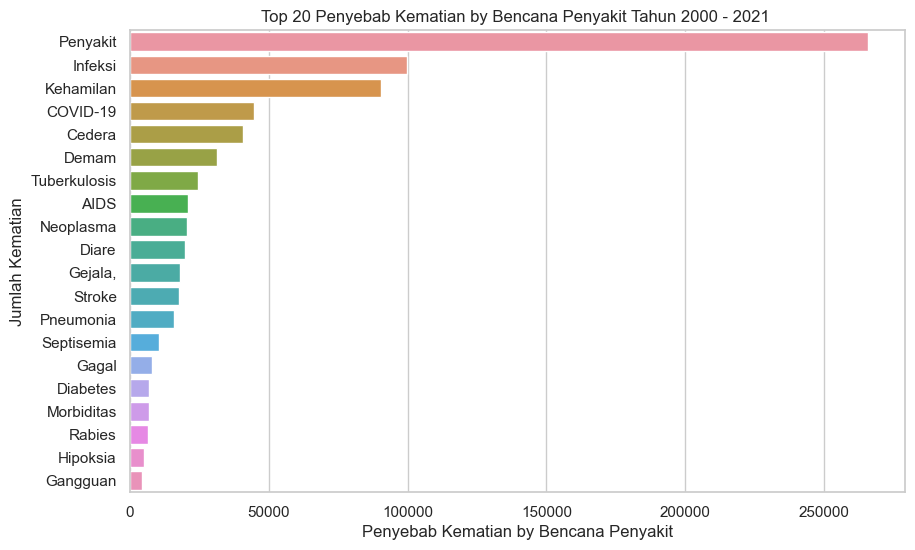

In [456]:
# Mengelompokkan berdasarkan kolom 'Keyword' dan menghitung sum dari 'Total Deaths' setiap grup
top_causes_by_penyakit_keyword = df[df['Keyword'].isin(bencana_penyakit_keyword)].groupby('Keyword')['Total Deaths'].sum().nlargest(20)

# Mengatur gaya visualisasi Seaborn
sns.set(style="whitegrid")

# Membuat plot menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_causes_by_penyakit_keyword.values, y=top_causes_by_penyakit_keyword.index)
plt.xlabel('Penyebab Kematian by Bencana Penyakit')
plt.ylabel('Jumlah Kematian')
plt.title('Top 20 Penyebab Kematian by Bencana Penyakit Tahun 2000 - 2021 ')

# Menampilkan plot
plt.show()

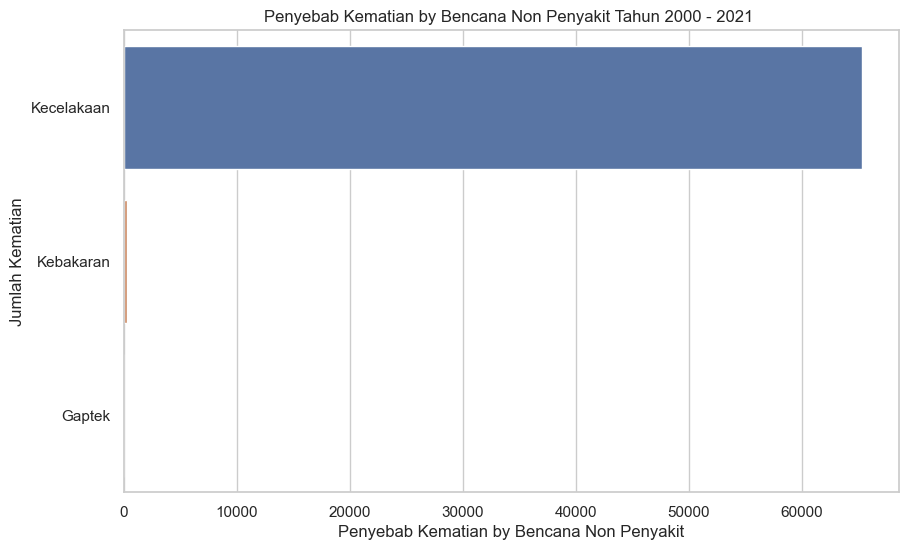

In [470]:
# Mengelompokkan berdasarkan kolom 'Keyword' dan menghitung sum dari 'Total Deaths' setiap grup
top_causes_by_bencana_non_penyakit = df[df['Keyword'].isin(bencana_non_penyakit_keyword)].groupby('Keyword')['Total Deaths'].sum().nlargest(20)

# Mengatur gaya visualisasi Seaborn
sns.set(style="whitegrid")

# Membuat plot menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_causes_by_bencana_non_penyakit.values, y=top_causes_by_bencana_non_penyakit.index)
plt.xlabel('Penyebab Kematian by Bencana Non Penyakit')
plt.ylabel('Jumlah Kematian')
plt.title('Penyebab Kematian by Bencana Non Penyakit Tahun 2000 - 2021 ')

# Menampilkan plot
plt.show()

In [461]:
df_infeksi = df[df['Cause'].str.contains('.*Infeksi.*', regex=True)]
df_infeksi.head()

,Keyword,Cause,Type,Year,Data Redundancy,Total Deaths,Source,Page at Source
436,Infeksi,Infeksi khusus lainnya pada masa perinatal,Bencana Non Alam dan Penyakit,2004,1,137,Profil Kesehatan Indonesia Tahun 2004,16
437,Infeksi,Infeksi khusus lainnya pada masa perinatal,Bencana Non Alam dan Penyakit,2005,1,138,Profil Kesehatan Indonesia Tahun 2005,17
438,Infeksi,Infeksi khusus lainnya pada masa perinatal,Bencana Non Alam dan Penyakit,2006,1,117,Profil Kesehatan Indonesia Tahun 2006,21
439,Infeksi,Infeksi Saluran Napas Bagian Atas Akut Lainnya,Bencana Non Alam dan Penyakit,2004,1,5532,Profil Kesehatan Indonesia Tahun 2004,20
440,Infeksi,Infeksi Saluran Napas Bagian Atas Akut Lainnya,Bencana Non Alam dan Penyakit,2009,1,162,Profil Kesehatan Indonesia Tahun 2009,Lampiran 3.3


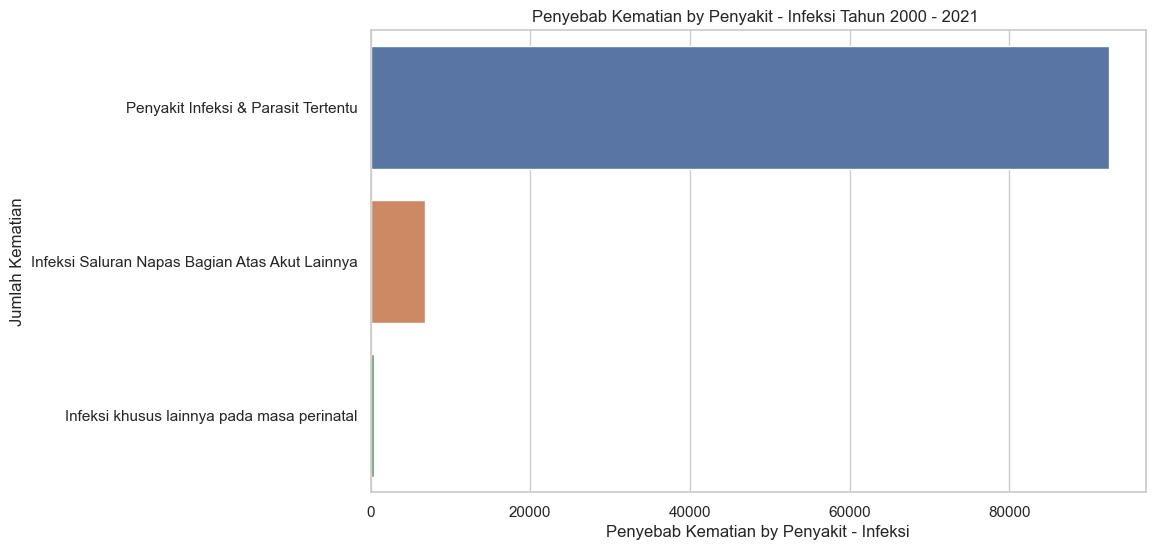

In [469]:
# Mengelompokkan berdasarkan kolom 'Keyword' dan menghitung sum dari 'Total Deaths' setiap grup
top_causes_by_penyakit_jenis_infeksi = df[df['Keyword'] == "Infeksi" ].groupby('Cause')['Total Deaths'].sum().nlargest(20)

# Mengatur gaya visualisasi Seaborn
sns.set(style="whitegrid")

# Membuat plot menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_causes_by_penyakit_jenis_infeksi.values, y=top_causes_by_penyakit_jenis_infeksi.index)
plt.xlabel('Penyebab Kematian by Penyakit - Infeksi')
plt.ylabel('Jumlah Kematian')
plt.title('Penyebab Kematian by Penyakit - Infeksi Tahun 2000 - 2021 ')

# Menampilkan plot
plt.show()


In [483]:
df_penyakit = df[df['Cause'].str.contains('.*Penyakit.*', regex=True)]
# print(len(df_penyakit['Keyword']))
# print(len(df_penyakit['Cause']))
df_penyakit.groupby('Keyword')['Total Deaths'].sum()

Keyword
Gangguan      1706
Infeksi      92453
KLB            158
Penyakit    265871
Name: Total Deaths, dtype: int64

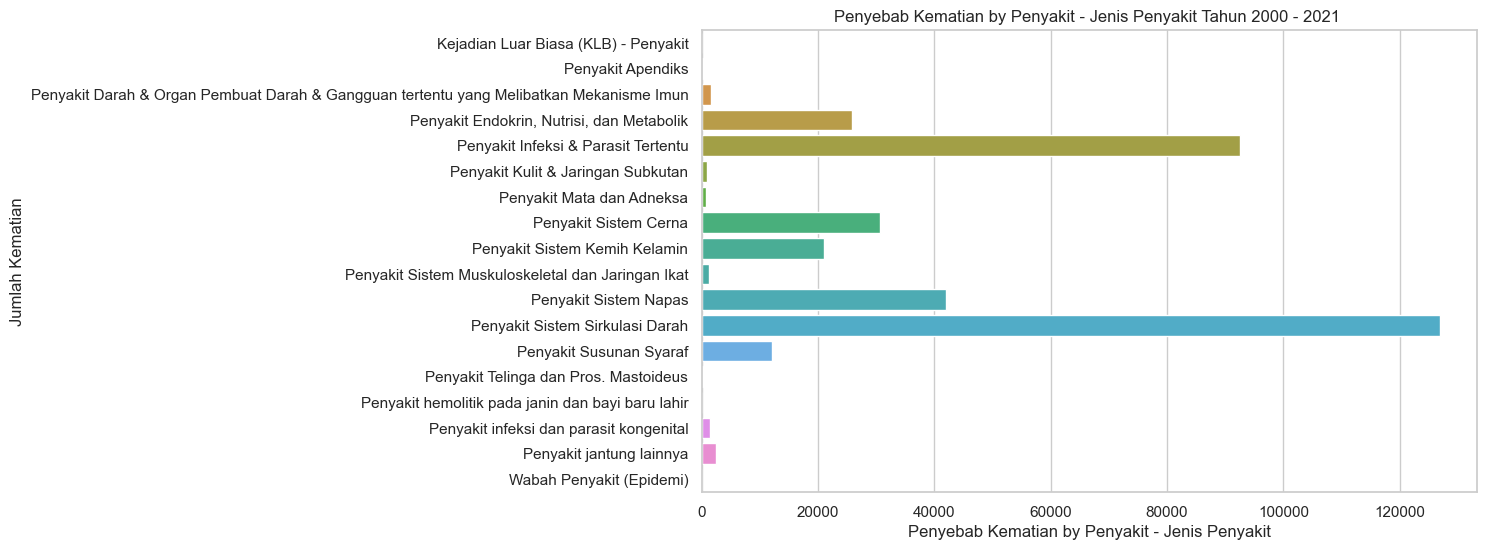

In [485]:
# Mengelompokkan berdasarkan kolom 'Keyword' dan menghitung sum dari 'Total Deaths' setiap grup
top_causes_by_penyakit_jenis_penyakit = df_penyakit.groupby('Cause')['Total Deaths'].sum()

# Mengatur gaya visualisasi Seaborn
sns.set(style="whitegrid")

# Membuat plot menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_causes_by_penyakit_jenis_penyakit.values, y=top_causes_by_penyakit_jenis_penyakit.index)
plt.xlabel('Penyebab Kematian by Penyakit - Jenis Penyakit')
plt.ylabel('Jumlah Kematian')
plt.title('Penyebab Kematian by Penyakit - Jenis Penyakit Tahun 2000 - 2021 ')

# Menampilkan plot
plt.show()


In [488]:
df['Year'].unique()

array([2012, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2019, 2015, 2016, 2017, 2018, 2013, 2014, 2021],
      dtype=int64)

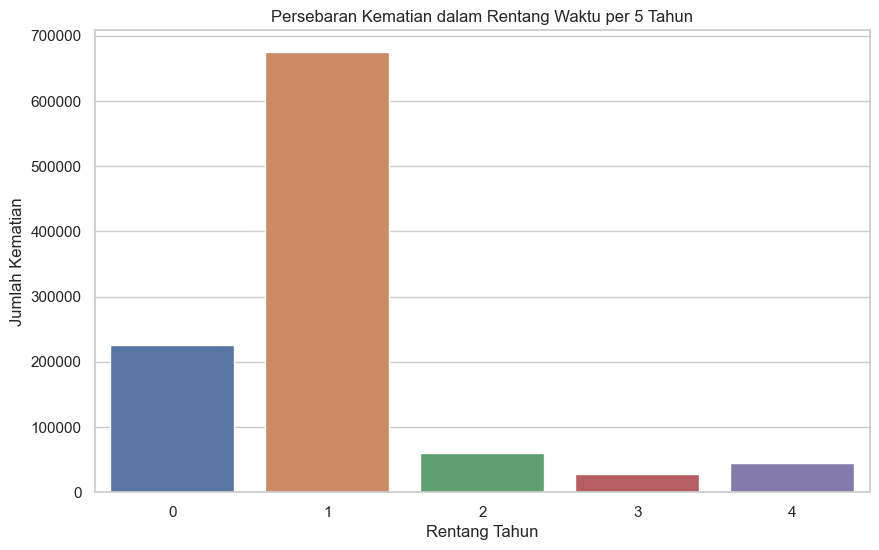

In [490]:
# Membuat rentang waktu per 5 tahun
df['Year Range'] = pd.cut(df['Year'], bins=range(2000, 2026, 5), right=False, labels=False)

yearly_deaths = df.groupby('Year Range')['Total Deaths'].sum()

# Mengatur gaya visualisasi Seaborn
sns.set(style="whitegrid")

# Membuat plot menggunakan Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=yearly_deaths.index, y=yearly_deaths.values)
plt.xlabel('Rentang Tahun')
plt.ylabel('Jumlah Kematian')
plt.title('Persebaran Kematian dalam Rentang Waktu per 5 Tahun')

# Menampilkan plot
plt.show()
